In [1]:
#Import standadrd librires
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Input
from sklearn.metrics import confusion_matrix
from os import listdir
from tensorflow.keras import layers
import PIL
from tensorflow.keras.models import Sequential

In [2]:
#import the content from the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
test_path = '/content/drive/MyDrive/Image_classification/test_path'
train_path='/content/drive/MyDrive/Image_classification/train_path'

In [4]:
image_count = len(list(train_path))
print(image_count)

54


In [5]:
image_test = len(list(test_path))
print(image_test)

53


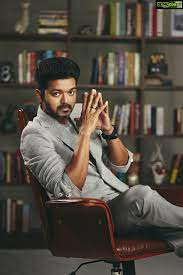

In [6]:
vijay = list(test_path)
PIL.Image.open(str('/content/drive/MyDrive/Image_classification/test_path/Vijay/download (5).jpeg'))

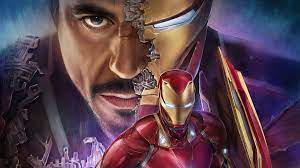

In [7]:
iorn_man = list(test_path)
PIL.Image.open(str('/content/drive/MyDrive/Image_classification/test_path/Iron_Man/download (5).jpeg'))

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 185 files belonging to 7 classes.
Using 148 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 424 files belonging to 7 classes.
Using 84 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['Been', 'CR7', 'Iron_Man', 'Jonny', 'Messi', 'Vijay', 'chris']


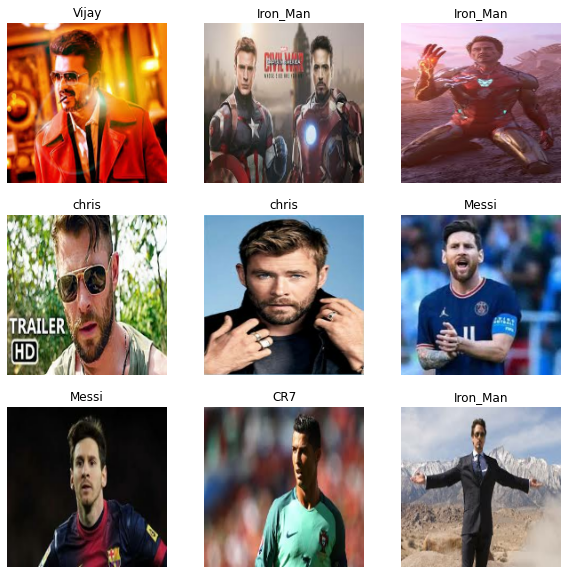

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
normalization_layer = layers.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [17]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [20]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 7s 253ms/step - loss: 2.0767 - accuracy: 0.1419 - val_loss: 1.9344 - val_accuracy: 0.1548
Epoch 2/10
5/5 [==============================] - 0s 42ms/step - loss: 1.8177 - accuracy: 0.2703 - val_loss: 1.7826 - val_accuracy: 0.4048
Epoch 3/10
5/5 [==============================] - 0s 33ms/step - loss: 1.6025 - accuracy: 0.4662 - val_loss: 1.6261 - val_accuracy: 0.3810
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 1.2780 - accuracy: 0.5743 - val_loss: 1.6200 - val_accuracy: 0.3690
Epoch 5/10
5/5 [==============================] - 0s 29ms/step - loss: 0.9788 - accuracy: 0.6892 - val_loss: 1.7400 - val_accuracy: 0.4286
Epoch 6/10
5/5 [==============================] - 0s 28ms/step - loss: 0.6794 - accuracy: 0.8041 - val_loss: 1.9196 - val_accuracy: 0.3690
Epoch 7/10
5/5 [==============================] - 0s 29ms/step - loss: 0.4722 - accuracy: 0.8446 - val_loss: 1.8927 - val_accuracy: 0.3810
Epoch 8/10
5/5 [==========

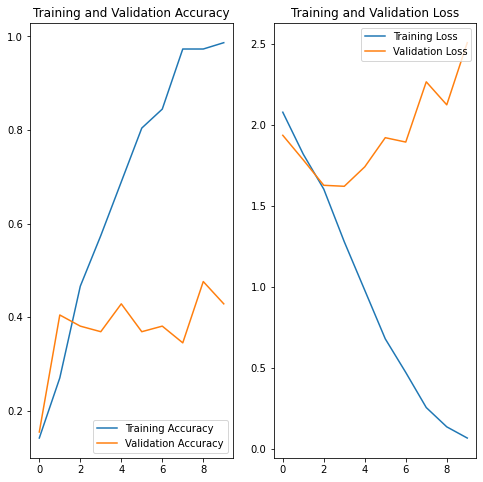

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
import keras
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

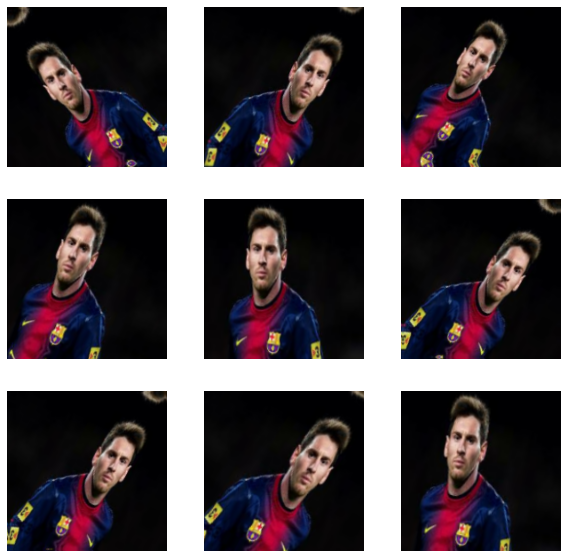

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [24]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [27]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
5/5 [==============================] - 1s 71ms/step - loss: 2.1854 - accuracy: 0.1081 - val_loss: 1.9197 - val_accuracy: 0.2500
Epoch 2/15
5/5 [==============================] - 0s 36ms/step - loss: 1.9142 - accuracy: 0.1892 - val_loss: 1.8996 - val_accuracy: 0.1548
Epoch 3/15
5/5 [==============================] - 0s 32ms/step - loss: 1.8828 - accuracy: 0.1554 - val_loss: 1.8584 - val_accuracy: 0.2619
Epoch 4/15
5/5 [==============================] - 0s 32ms/step - loss: 1.8345 - accuracy: 0.2973 - val_loss: 1.7443 - val_accuracy: 0.3810
Epoch 5/15
5/5 [==============================] - 0s 30ms/step - loss: 1.7596 - accuracy: 0.3108 - val_loss: 1.6649 - val_accuracy: 0.4048
Epoch 6/15
5/5 [==============================] - 0s 34ms/step - loss: 1.6671 - accuracy: 0.3176 - val_loss: 1.6073 - val_accuracy: 0.4286
Epoch 7/15
5/5 [==============================] - 0s 30ms/step - loss: 1.6193 - accuracy: 0.3649 - val_loss: 1.5862 - val_accuracy: 0.3929
Epoch 8/15
5/5 [===========

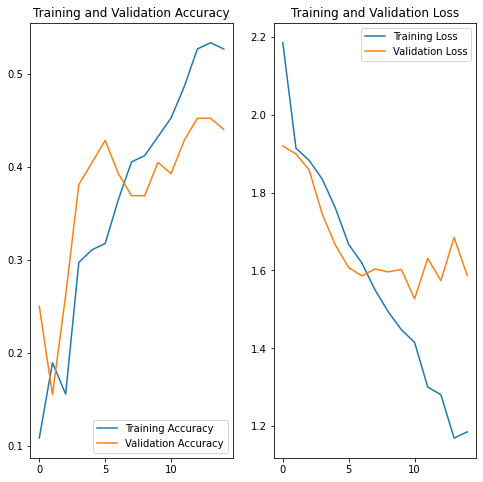

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:

sunflower_url = '/content/drive/MyDrive/Image_classification/test_path/Iron_Man/download (5).jpeg'
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

ValueError: ignored